In [1]:
import pandas as pd
import numpy as np 
import copy
from matplotlib import pyplot as plt
import seaborn as sns
from collections import *
from scipy.stats import pearsonr 

In [2]:
datamr=pd.read_excel(r"C:\Users\Mark 1\Desktop\Lockdown\data\Covid-19\monthly_case_series/coviddata_mar.xlsx")
dataap=pd.read_csv(r"C:\Users\Mark 1\Desktop\Lockdown\data\Covid-19\monthly_case_series\coviddata_apr.csv")
datamy=pd.read_csv(r"C:\Users\Mark 1\Desktop\Lockdown\data\Covid-19\monthly_case_series\coviddata_may.csv")
datajn=pd.read_csv(r"C:\Users\Mark 1\Desktop\Lockdown\data\Covid-19\monthly_case_series\coviddata_june.csv")
datajly=pd.read_excel(r"C:\Users\Mark 1\Desktop\Lockdown\data\Covid-19\monthly_case_series\coviddata_jly.xlsx")
dataaug=pd.read_excel(r"C:\Users\Mark 1\Desktop\Lockdown\data\Covid-19\monthly_case_series\coviddata_aug.xlsx")
dataspt=pd.read_excel(r"C:\Users\Mark 1\coviddata_spt.xlsx")

In [3]:
datamr.head()

,Unnamed: 0,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,31,2020-03-01,0,3,0,3,0,0
1,32,2020-03-02,2,5,0,3,0,0
2,33,2020-03-03,1,6,0,3,0,0
3,34,2020-03-04,22,28,0,3,0,0
4,35,2020-03-05,2,30,0,3,0,0


In [4]:
dataap.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,01-Apr,424,2059,19,169,6,53
1,02-Apr,486,2545,22,191,16,69
2,03-Apr,560,3105,39,230,14,83
3,04-Apr,579,3684,56,286,13,96
4,05-Apr,609,4293,43,329,22,118


In [5]:
date=dataap["Date"]
date=list(date)

In [6]:
for i in range(len(date)):
    date[i]=date[i].strip("-Apr")
    

In [7]:
for i in range(len(date)):
    date[i]="2020-04-"+date[i]


In [8]:
dataap["Date"]=date

In [9]:
dataap['Date'] = dataap['Date'].astype('datetime64[ns]') 
dataap.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-04-01,424,2059,19,169,6,53
1,2020-04-02,486,2545,22,191,16,69
2,2020-04-03,560,3105,39,230,14,83
3,2020-04-04,579,3684,56,286,13,96
4,2020-04-05,609,4293,43,329,22,118


In [10]:
date=datamy["Date"]
date=list(date)

In [11]:
for i in range(len(date)):
    date[i]=date[i].strip("-May")
    

In [12]:
for i in range(len(date)):
    date[i]="2020-05-"+date[i]


In [13]:
datamy["Date"]=date

In [14]:
datamy['Date'] = datamy['Date'].astype('datetime64[ns]') 
datamy.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-05-01,2396,37262,962,10021,77,1231
1,2020-05-02,2564,39826,831,10852,92,1323
2,2020-05-03,2952,42778,911,11763,140,1463
3,2020-05-04,3656,46434,1082,12845,103,1566
4,2020-05-05,2971,49405,1295,14140,128,1694


In [15]:
date=datajn["Date"]
date=list(date)

In [16]:
for i in range(len(date)):
    date[i]=date[i].strip("-Jun")
    

In [17]:
for i in range(len(date)):
    date[i]="2020-06-"+date[i]


In [18]:
datajn["Date"]=date

In [19]:
datajn['Date'] = datajn['Date'].astype('datetime64[ns]') 
datajn.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-06-01,7723,198372,3882,95744,201,5607
1,2020-06-02,8812,207187,4531,100275,222,5829
2,2020-06-03,9689,216876,3789,104064,259,6088
3,2020-06-04,9847,226723,4390,108454,274,6362
4,2020-06-05,9472,236195,4770,113224,286,6648


In [20]:
dt_mrgd=pd.concat([datamr,dataap,datamy,datajn,datajly,dataaug,dataspt],axis=0)
dt_mrgd = dt_mrgd.loc[:, ~dt_mrgd.columns.str.contains('^Unnamed')]
dt_mrgd.reset_index(inplace = True, drop = True) 
dt_mrgd

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-03-01,0,3,0,3,0,0
1,2020-03-02,2,5,0,3,0,0
2,2020-03-03,1,6,0,3,0,0
3,2020-03-04,22,28,0,3,0,0
4,2020-03-05,2,30,0,3,0,0
...,...,...,...,...,...,...,...
187,2020-09-04,87115,4020252,69625,3104505,950,69179
188,2020-09-05,90600,4110852,73161,3177666,916,70095
189,2020-09-06,91723,4202575,69624,3247290,1008,71103
190,2020-09-07,75022,4277597,74123,3321413,1129,72232


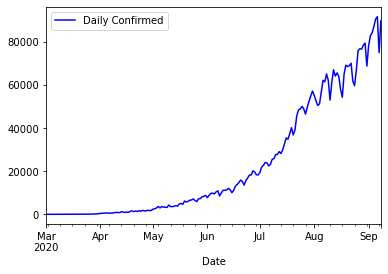

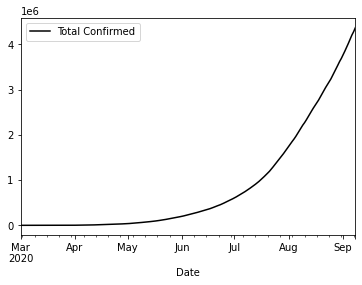

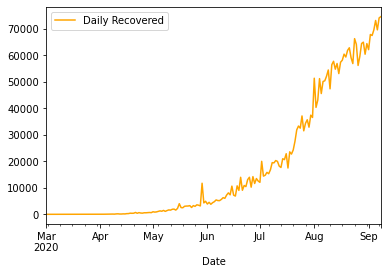

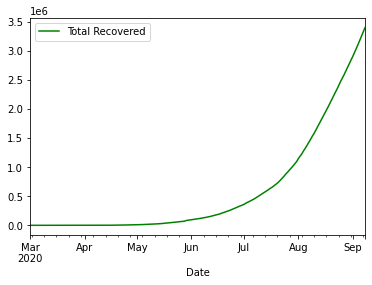

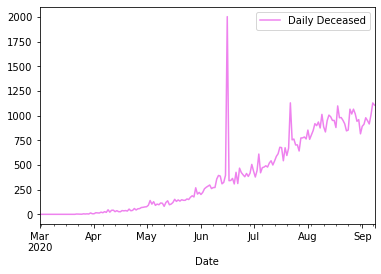

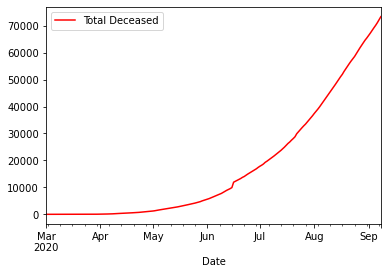

In [21]:
colss=list(dt_mrgd.columns)
colss.pop(0)
for m,n in zip(colss,["blue","black","orange","green","violet","red"]):
    dt_mrgd.plot(x="Date",y=m,color=n)

In [22]:
dt_mrgd_diff=dt_mrgd.copy()
dt_mrgd_diff.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-03-01,0,3,0,3,0,0
1,2020-03-02,2,5,0,3,0,0
2,2020-03-03,1,6,0,3,0,0
3,2020-03-04,22,28,0,3,0,0
4,2020-03-05,2,30,0,3,0,0


In [23]:
new_cols=["Daily_Confirmed_Diff","Total_Confirmed_Diff","Daily_Recovered_Diff","Total_Recovered_Diff","Daily_Deceased_Diff","Total_Deceased_diff"]
existing_cols=list(dt_mrgd_diff.columns)
existing_cols.pop(0)
existing_cols
for i,j in zip(new_cols,existing_cols):
    dt_mrgd_diff[i]=list(range(len(dt_mrgd_diff)))
    dt_mrgd_diff[i][0]=dt_mrgd_diff[j][0]
    for k in range(0,len(dt_mrgd_diff)-1):
        dt_mrgd_diff[i][k+1]=dt_mrgd_diff[j][k+1]-dt_mrgd_diff[j][k]
        

<ipython-input-23-20fe458c53e6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_mrgd_diff[i][0]=dt_mrgd_diff[j][0]
<ipython-input-23-20fe458c53e6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_mrgd_diff[i][k+1]=dt_mrgd_diff[j][k+1]-dt_mrgd_diff[j][k]


In [24]:
dt_mrgd_diff.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Daily_Confirmed_Diff,Total_Confirmed_Diff,Daily_Recovered_Diff,Total_Recovered_Diff,Daily_Deceased_Diff,Total_Deceased_diff
0,2020-03-01,0,3,0,3,0,0,0,3,0,3,0,0
1,2020-03-02,2,5,0,3,0,0,2,2,0,0,0,0
2,2020-03-03,1,6,0,3,0,0,-1,1,0,0,0,0
3,2020-03-04,22,28,0,3,0,0,21,22,0,0,0,0
4,2020-03-05,2,30,0,3,0,0,-20,2,0,0,0,0


In [25]:
dt_mrgd_diff["Total Confirmed"][4]-dt_mrgd_diff["Total Confirmed"][3]==dt_mrgd_diff["Total_Confirmed_Diff"][4]

True

In [26]:
dt_mrgd_diff.describe()

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Daily_Confirmed_Diff,Total_Confirmed_Diff,Daily_Recovered_Diff,Total_Recovered_Diff,Daily_Deceased_Diff,Total_Deceased_diff
count,192.000000,1.920000e+02,192.000000,1.920000e+02,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,22745.687500,8.469022e+05,17687.588542,5.907191e+05,381.973958,17699.291667,467.979167,22747.130208,388.578125,17687.604167,5.765625,381.973958
std,26955.780354,1.185997e+06,22994.757797,8.990147e+05,381.428789,21577.890061,2908.227216,26957.493097,2878.415070,22994.745717,181.078943,381.428789
min,0.000000,3.000000e+00,0.000000,3.000000e+00,0.000000,0.000000,-16701.000000,1.000000,-11013.000000,0.000000,-1663.000000,0.000000
25%,1242.000000,1.538225e+04,359.250000,2.359500e+03,38.000000,513.250000,-128.500000,1242.000000,-176.250000,359.250000,-15.000000,38.000000
50%,9580.500000,2.314590e+05,5049.500000,1.108390e+05,270.000000,6505.000000,84.500000,9580.500000,11.500000,5049.500000,1.000000,270.000000
75%,45821.750000,1.251796e+06,31602.750000,7.924905e+05,703.250000,30090.750000,1097.500000,45821.750000,842.000000,31602.750000,20.250000,703.250000
max,91723.000000,4.367449e+06,74607.000000,3.396020e+06,2004.000000,73339.000000,14830.000000,91723.000000,14814.000000,74607.000000,1608.000000,2004.000000


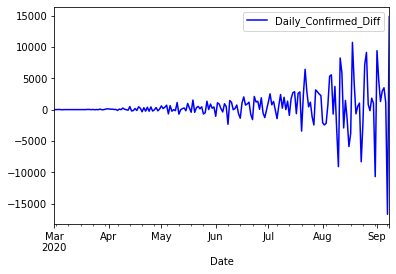

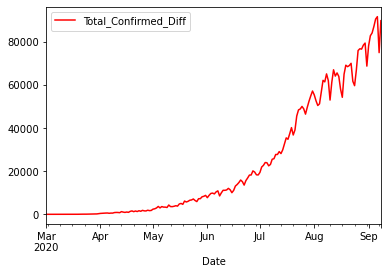

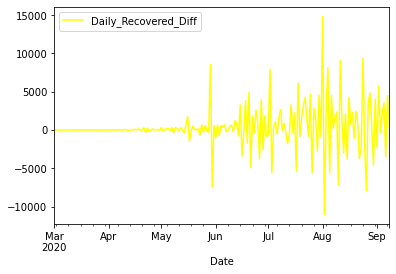

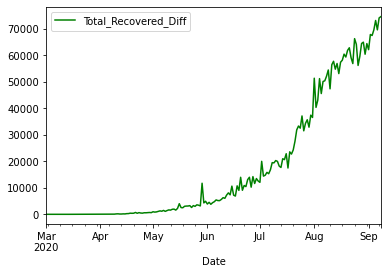

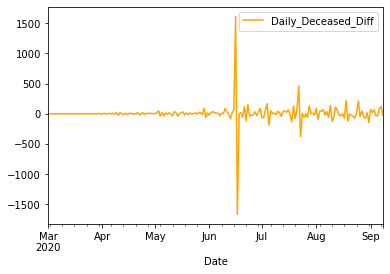

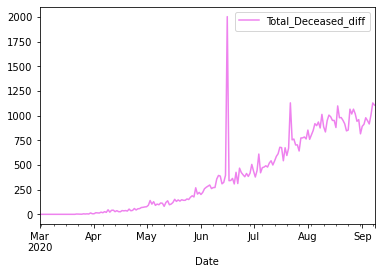

In [27]:
colors=["Blue","Red","Yellow","Green","Orange","Violet"]
for i,j in zip(new_cols,colors):
    dt_mrgd_diff.plot(x="Date",y=i,color=j)

In [28]:
dt_mrgd_diff

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Daily_Confirmed_Diff,Total_Confirmed_Diff,Daily_Recovered_Diff,Total_Recovered_Diff,Daily_Deceased_Diff,Total_Deceased_diff
0,2020-03-01,0,3,0,3,0,0,0,3,0,3,0,0
1,2020-03-02,2,5,0,3,0,0,2,2,0,0,0,0
2,2020-03-03,1,6,0,3,0,0,-1,1,0,0,0,0
3,2020-03-04,22,28,0,3,0,0,21,22,0,0,0,0
4,2020-03-05,2,30,0,3,0,0,-20,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2020-09-04,87115,4020252,69625,3104505,950,69179,2959,87115,2134,69625,-29,950
188,2020-09-05,90600,4110852,73161,3177666,916,70095,3485,90600,3536,73161,-34,916
189,2020-09-06,91723,4202575,69624,3247290,1008,71103,1123,91723,-3537,69624,92,1008
190,2020-09-07,75022,4277597,74123,3321413,1129,72232,-16701,75022,4499,74123,121,1129


In [29]:
kys=["daily_cnf_diff_pos_neg","total_cnf_diff_pos_neg","daily_rcvd_diff_pos_neg","total_rcvd_diff_pos_neg","daily_dcsd_diff_pos_neg","total_dcsd_diff_pos_neg"]
new_cols=["Daily_Confirmed_Diff","Total_Confirmed_Diff","Daily_Recovered_Diff","Total_Recovered_Diff","Daily_Deceased_Diff","Total_Deceased_diff"]
pos_neg_dict={}
pos_neg_len_dict={}
a=[]
b=[]
for i,j in zip(kys,new_cols):
    pos=dt_mrgd_diff[dt_mrgd_diff[j]>0]
    a.append(pos)
    b.append(len(pos))
    neg=dt_mrgd_diff[dt_mrgd_diff[j]<0]
    a.append(neg)
    b.append(len(neg))
    zro=dt_mrgd_diff[dt_mrgd_diff[j]==0]
    a.append(zro)
    b.append(len(zro))
    pos_neg_dict.update({i:a})
    pos_neg_len_dict.update({i:b})
    a=[]
    b=[]



In [30]:
dt_mrgd_ratio=dt_mrgd[22:].copy()
dt_mrgd_ratio.reset_index(inplace = True, drop = True)
dt_mrgd_ratio.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-03-23,94,497,2,25,2,9
1,2020-03-24,74,571,15,40,1,10
2,2020-03-25,86,657,3,43,1,11
3,2020-03-26,73,730,7,50,5,16
4,2020-03-27,153,883,25,75,3,19


In [31]:
new_cols=["Daily_Confirmed_Ratio","Total_Confirmed_Ratio","Daily_Recovered_Ratio","Total_Recovered_Ratio","Daily_Deceased_Ratio","Total_Deceased_Ratio"]
existing_cols=list(dt_mrgd_ratio.columns)
existing_cols.pop(0)
existing_cols
for i,j in zip(new_cols,existing_cols):
    dt_mrgd_ratio[i]=list(range(len(dt_mrgd_ratio)))
    dt_mrgd_ratio[i][0]=1
    tmp=[]
    tmp.append(dt_mrgd_ratio[i][0])
    for k in range(0,len(dt_mrgd_ratio)-1):
        tmp.append(round(dt_mrgd_ratio[j][k+1]/dt_mrgd_ratio[j][k],2))
    dt_mrgd_ratio[i]=tmp
dt_mrgd_ratio.head()
        

<ipython-input-31-cb91132e2a8f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_mrgd_ratio[i][0]=1


,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Daily_Confirmed_Ratio,Total_Confirmed_Ratio,Daily_Recovered_Ratio,Total_Recovered_Ratio,Daily_Deceased_Ratio,Total_Deceased_Ratio
0,2020-03-23,94,497,2,25,2,9,1.00,1.00,1.00,1.00,1.0,1.00
1,2020-03-24,74,571,15,40,1,10,0.79,1.15,7.50,1.60,0.5,1.11
2,2020-03-25,86,657,3,43,1,11,1.16,1.15,0.20,1.08,1.0,1.10
3,2020-03-26,73,730,7,50,5,16,0.85,1.11,2.33,1.16,5.0,1.45
4,2020-03-27,153,883,25,75,3,19,2.10,1.21,3.57,1.50,0.6,1.19


In [32]:
round(dt_mrgd_ratio["Total Confirmed"][4]/dt_mrgd_ratio["Total Confirmed"][3],2)==dt_mrgd_ratio["Total_Confirmed_Ratio"][4]

True

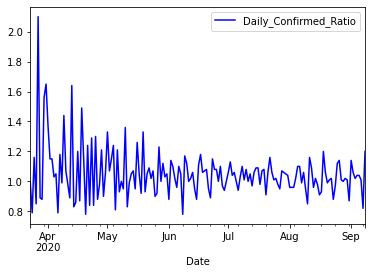

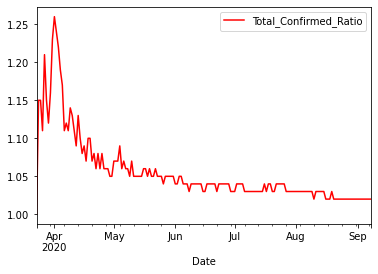

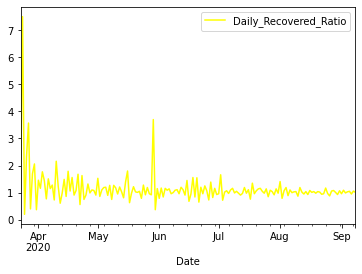

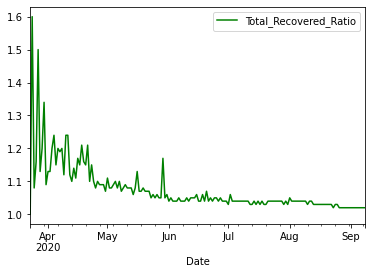

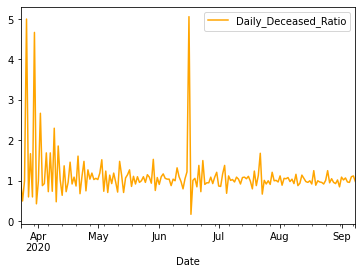

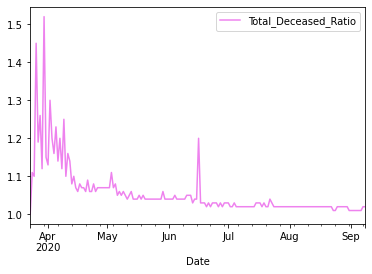

In [33]:
colors=["Blue","Red","Yellow","Green","Orange","Violet"]
for i,j in zip(new_cols,colors):
    dt_mrgd_ratio.plot(x="Date",y=i,color=j)

In [34]:
new_cols=["Daily_Confirmed_Ratio","Total_Confirmed_Ratio","Daily_Recovered_Ratio","Total_Recovered_Ratio","Daily_Deceased_Ratio","Total_Deceased_Ratio"]
existing_cols=list(dt_mrgd_ratio.columns)
existing_cols.pop(0)
existing_cols
for i,j in zip(new_cols,existing_cols):
    dt_mrgd_ratio[i]=list(range(len(dt_mrgd_ratio)))
    dt_mrgd_ratio[i][0]=1
    tmp=[]
    tmp.append(dt_mrgd_ratio[i][0])
    for k in range(0,len(dt_mrgd_ratio)-1):
        tmp.append(dt_mrgd_ratio[j][k+1]/dt_mrgd_ratio[j][k])
    dt_mrgd_ratio[i]=tmp
dt_mrgd_ratio.head()
        

<ipython-input-34-ba3f6f7cd61a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_mrgd_ratio[i][0]=1


,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Daily_Confirmed_Ratio,Total_Confirmed_Ratio,Daily_Recovered_Ratio,Total_Recovered_Ratio,Daily_Deceased_Ratio,Total_Deceased_Ratio
0,2020-03-23,94,497,2,25,2,9,1.000000,1.000000,1.000000,1.000000,1.0,1.000000
1,2020-03-24,74,571,15,40,1,10,0.787234,1.148893,7.500000,1.600000,0.5,1.111111
2,2020-03-25,86,657,3,43,1,11,1.162162,1.150613,0.200000,1.075000,1.0,1.100000
3,2020-03-26,73,730,7,50,5,16,0.848837,1.111111,2.333333,1.162791,5.0,1.454545
4,2020-03-27,153,883,25,75,3,19,2.095890,1.209589,3.571429,1.500000,0.6,1.187500


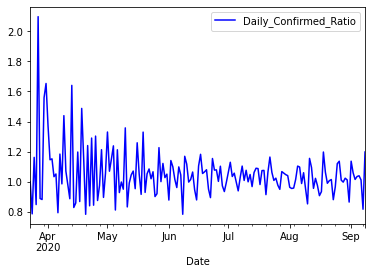

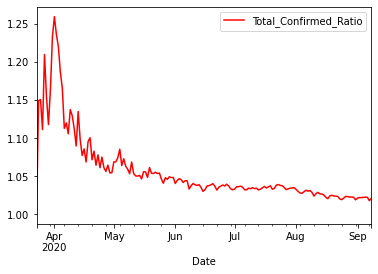

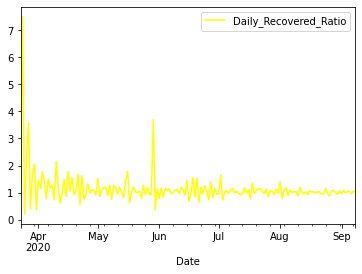

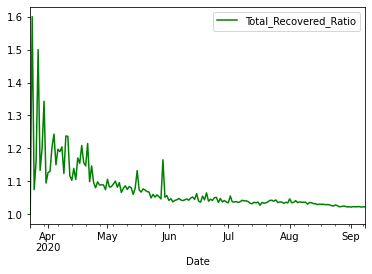

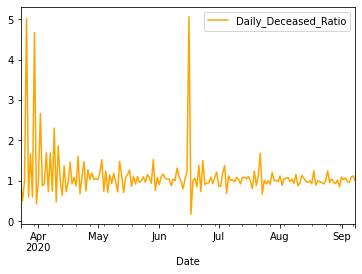

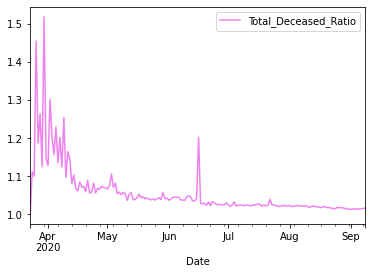

In [35]:
colors=["Blue","Red","Yellow","Green","Orange","Violet"]
for i,j in zip(new_cols,colors):
    dt_mrgd_ratio.plot(x="Date",y=i,color=j)

In [36]:
kys=["daily_cnf_diff_rat10","total_cnf_diff_rat10","daily_rcvd_diff_rat10","total_rcvd_diff_rat10","daily_dcsd_diff_rat10","total_dcsd_diff_rat10"]
new_cols=["Daily_Confirmed_Ratio","Total_Confirmed_Ratio","Daily_Recovered_Ratio","Total_Recovered_Ratio","Daily_Deceased_Ratio","Total_Deceased_Ratio"]
one_zro_dict={}
one_zro_len_dict={}
a=[]
b=[]
for i,j in zip(kys,new_cols):
    pos=dt_mrgd_ratio[dt_mrgd_ratio[j]>=1]
    a.append(pos)
    b.append(len(pos))
    neg=dt_mrgd_ratio[dt_mrgd_ratio[j]<1]
    a.append(neg)
    b.append(len(neg))
    zro=dt_mrgd_ratio[dt_mrgd_ratio[j]==0]
    a.append(zro)
    b.append(len(zro))
    one_zro_dict.update({i:a})
    one_zro_len_dict.update({i:b})
    a=[]
    b=[]





In [37]:
datamr.reset_index(inplace = True, drop = True)
datamr.head()

,Unnamed: 0,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,31,2020-03-01,0,3,0,3,0,0
1,32,2020-03-02,2,5,0,3,0,0
2,33,2020-03-03,1,6,0,3,0,0
3,34,2020-03-04,22,28,0,3,0,0
4,35,2020-03-05,2,30,0,3,0,0


In [38]:

dataap.reset_index(inplace = True, drop = True)
dataap.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-04-01,424,2059,19,169,6,53
1,2020-04-02,486,2545,22,191,16,69
2,2020-04-03,560,3105,39,230,14,83
3,2020-04-04,579,3684,56,286,13,96
4,2020-04-05,609,4293,43,329,22,118


In [39]:

datamy.reset_index(inplace = True, drop = True)
datamy.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-05-01,2396,37262,962,10021,77,1231
1,2020-05-02,2564,39826,831,10852,92,1323
2,2020-05-03,2952,42778,911,11763,140,1463
3,2020-05-04,3656,46434,1082,12845,103,1566
4,2020-05-05,2971,49405,1295,14140,128,1694


In [40]:

datajn.reset_index(inplace = True, drop = True)
datajn.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-06-01,7723,198372,3882,95744,201,5607
1,2020-06-02,8812,207187,4531,100275,222,5829
2,2020-06-03,9689,216876,3789,104064,259,6088
3,2020-06-04,9847,226723,4390,108454,274,6362
4,2020-06-05,9472,236195,4770,113224,286,6648


In [41]:
tc_mean_list=[]
tr_mean_list=[]
td_mean_list=[]

In [42]:
tc_mean_list.append(datamr["Total Confirmed"][len(datamr)-1]/len(datamr))
tc_mean_list.append(dataap["Total Confirmed"][len(dataap)-1]/len(dataap))
tc_mean_list.append(datamy["Total Confirmed"][len(datamy)-1]/len(datamy))
tc_mean_list.append(datajn["Total Confirmed"][len(datajn)-1]/len(datajn))
tc_mean_list.append(datajly["Total Confirmed"][len(datajly)-1]/len(datajly))
tc_mean_list.append(dataaug["Total Confirmed"][len(dataaug)-1]/len(dataaug))


tr_mean_list.append(datamr["Total Recovered"][len(datamr)-1]/len(datamr))
tr_mean_list.append(dataap["Total Recovered"][len(dataap)-1]/len(dataap))
tr_mean_list.append(datamy["Total Recovered"][len(datamy)-1]/len(datamy))
tr_mean_list.append(datajn["Total Recovered"][len(datajn)-1]/len(datajn))
tr_mean_list.append(datajly["Total Recovered"][len(datajly)-1]/len(datajly))
tr_mean_list.append(dataaug["Total Recovered"][len(dataaug)-1]/len(dataaug))

td_mean_list.append(datamr["Total Deceased"][len(datamr)-1]/len(datamr))
td_mean_list.append(dataap["Total Deceased"][len(dataap)-1]/len(dataap))
td_mean_list.append(datamy["Total Deceased"][len(datamy)-1]/len(datamy))
td_mean_list.append(datajn["Total Deceased"][len(datajn)-1]/len(datajn))
td_mean_list.append(datajly["Total Deceased"][len(datajly)-1]/len(datajly))
td_mean_list.append(dataaug["Total Deceased"][len(dataaug)-1]/len(dataaug))


In [43]:
mean_data={"month":["March","April","May","June","July","August"],"month_end":["2020-03-31","2020-04-30","2020-05-31","2020-06-30","2020-07-31","2020-08-31"],"tc_mean":tc_mean_list,"tr_mean":tr_mean_list,"td_mean":td_mean_list}

In [44]:
mean_dataf=pd.DataFrame(mean_data)
mean_dataf['month_end'] = mean_dataf['month_end'].astype('datetime64[ns]') 
mean_dataf

,month,month_end,tc_mean,tr_mean,td_mean
0,March,2020-03-31,52.741935,4.838710,1.516129
1,April,2020-04-30,1162.200000,301.966667,38.466667
2,May,2020-05-31,6149.967742,2963.290323,174.387097
3,June,2020-06-30,19526.500000,11594.666667,580.366667
4,July,2020-07-31,54735.290323,35339.935484,1179.548387
5,August,2020-08-31,118966.225806,91528.064516,2111.129032


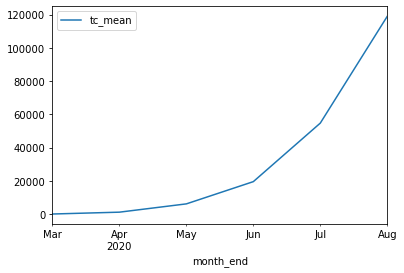

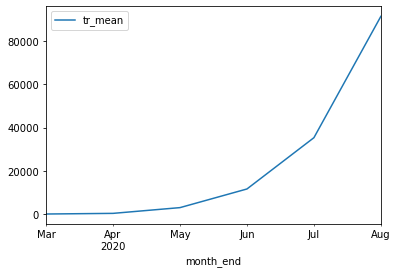

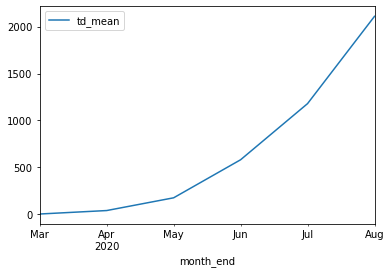

In [45]:
colls=list(mean_dataf.columns)
colls.pop(0)
colls.pop(0)
for i in colls:
    mean_dataf.plot(x="month_end",y=i)

In [46]:
dc_mean_list=[]
dr_mean_list=[]
dd_mean_list=[]

In [47]:
dc_mean_list.append(np.sum(datamr["Daily Confirmed"])/len(datamr))
dc_mean_list.append(np.sum(dataap["Daily Confirmed"])/len(dataap))
dc_mean_list.append(np.sum(datamy["Daily Confirmed"])/len(datamy))
dc_mean_list.append(np.sum(datajn["Daily Confirmed"])/len(datajn))
dc_mean_list.append(np.sum(datajly["Daily Confirmed"])/len(datajly))
dc_mean_list.append(np.sum(dataaug["Daily Confirmed"])/len(dataaug))


dr_mean_list.append(np.sum(datamr["Daily Recovered"])/len(datamr))
dr_mean_list.append(np.sum(dataap["Daily Recovered"])/len(dataap))
dr_mean_list.append(np.sum(datamy["Daily Recovered"])/len(datamy))
dr_mean_list.append(np.sum(datajn["Daily Recovered"])/len(datajn))
dr_mean_list.append(np.sum(datajly["Daily Recovered"])/len(datajly))
dr_mean_list.append(np.sum(dataaug["Daily Recovered"])/len(dataaug))


dd_mean_list.append(np.sum(datamr["Daily Deceased"])/len(datamr))
dd_mean_list.append(np.sum(dataap["Daily Deceased"])/len(dataap))
dd_mean_list.append(np.sum(datamy["Daily Deceased"])/len(datamy))
dd_mean_list.append(np.sum(datajn["Daily Deceased"])/len(datajn))
dd_mean_list.append(np.sum(datajly["Daily Deceased"])/len(datajly))
dd_mean_list.append(np.sum(dataaug["Daily Deceased"])/len(dataaug))


In [48]:
dmean_data={"month":["March","April","May","June","July","August"],"month_end":["2020-03-31","2020-04-30","2020-05-31","2020-06-30","2020-07-31","2020-08-31"],"dc_mean":dc_mean_list,"dr_mean":dr_mean_list,"dd_mean":dd_mean_list}

In [49]:
dmean_dataf=pd.DataFrame(dmean_data)
dmean_dataf['month_end'] = dmean_dataf['month_end'].astype('datetime64[ns]') 
dmean_dataf

,month,month_end,dc_mean,dr_mean,dd_mean
0,March,2020-03-31,52.645161,4.741935,1.516129
1,April,2020-04-30,1107.700000,296.966667,36.900000
2,May,2020-05-31,5025.258065,2671.064516,137.161290
3,June,2020-06-30,13171.533333,8532.600000,400.166667
4,July,2020-07-31,35838.677419,24119.290323,617.903226
5,August,2020-08-31,64222.096774,56188.129032,931.580645


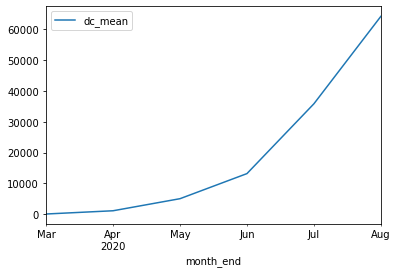

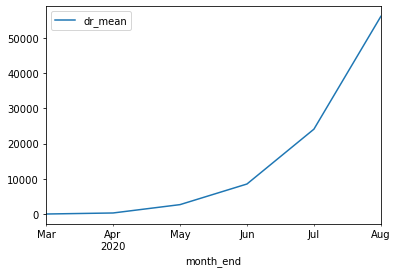

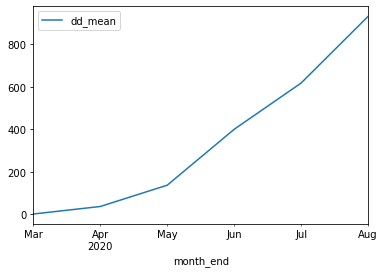

In [50]:
colls=list(dmean_dataf.columns)
colls.pop(0)
colls.pop(0)
for i in colls:
    dmean_dataf.plot(x="month_end",y=i)

In [51]:
tc_diff_list=[]
tr_diff_list=[]
td_diff_list=[]

In [52]:
tc_diff_list.append(datamr["Total Confirmed"][len(datamr)-1]-datamr["Total Confirmed"][0])
tc_diff_list.append(dataap["Total Confirmed"][len(dataap)-1]-dataap["Total Confirmed"][0])
tc_diff_list.append(datamy["Total Confirmed"][len(datamy)-1]-datamy["Total Confirmed"][0])
tc_diff_list.append(datajn["Total Confirmed"][len(datajn)-1]-datajn["Total Confirmed"][0])
tc_diff_list.append(datajly["Total Confirmed"][len(datajly)-1]-datajly["Total Confirmed"][0])
tc_diff_list.append(dataaug["Total Confirmed"][len(dataaug)-1]-dataaug["Total Confirmed"][0])


tr_diff_list.append(datamr["Total Recovered"][len(datamr)-1]-datamr["Total Recovered"][0])
tr_diff_list.append(dataap["Total Recovered"][len(dataap)-1]-dataap["Total Recovered"][0])
tr_diff_list.append(datamy["Total Recovered"][len(datamy)-1]-datamy["Total Recovered"][0])
tr_diff_list.append(datajn["Total Recovered"][len(datajn)-1]-datajn["Total Recovered"][0])
tr_diff_list.append(datajly["Total Recovered"][len(datajly)-1]-datajly["Total Recovered"][0])
tr_diff_list.append(dataaug["Total Recovered"][len(dataaug)-1]-dataaug["Total Recovered"][0])

td_diff_list.append(datamr["Total Deceased"][len(datamr)-1]-datamr["Total Deceased"][0])
td_diff_list.append(dataap["Total Deceased"][len(dataap)-1]-dataap["Total Deceased"][0])
td_diff_list.append(datamy["Total Deceased"][len(datamy)-1]-datamy["Total Deceased"][0])
td_diff_list.append(datajn["Total Deceased"][len(datajn)-1]-datajn["Total Deceased"][0])
td_diff_list.append(datajly["Total Deceased"][len(datajly)-1]-datajly["Total Deceased"][0])
td_diff_list.append(dataaug["Total Deceased"][len(dataaug)-1]-dataaug["Total Deceased"][0])


In [53]:
tdiff_data={"month":["March","April","May","June","July","August"],"month_end":["2020-03-31","2020-04-30","2020-05-31","2020-06-30","2020-07-31","2020-08-31"],"tc_diff":tc_diff_list,"tr_diff":tr_diff_list,"td_diff":td_diff_list}

In [54]:
diff_dataf=pd.DataFrame(tdiff_data)
diff_dataf['month_end'] = diff_dataf['month_end'].astype('datetime64[ns]') 
diff_dataf

,month,month_end,tc_diff,tr_diff,td_diff
0,March,2020-03-31,1632,147,47
1,April,2020-04-30,32807,8890,1101
2,May,2020-05-31,153387,81841,4175
3,June,2020-06-30,387423,252096,11804
4,July,2020-07-31,1091570,735634,18717
5,August,2020-08-31,1935768,1690464,28025


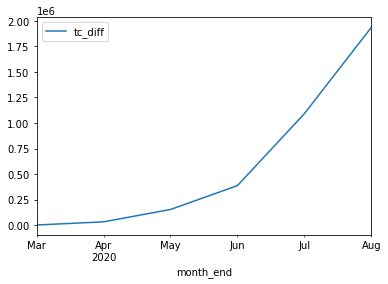

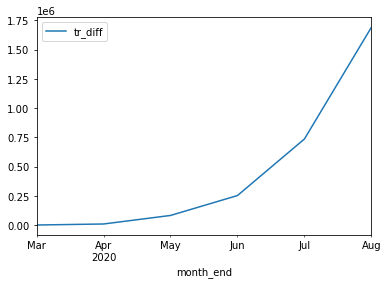

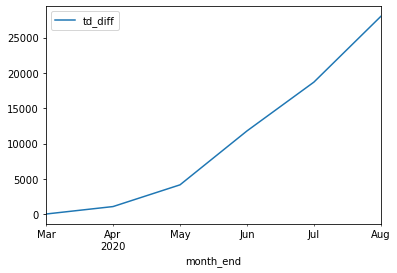

In [55]:
colls=list(diff_dataf.columns)
colls.pop(0)
colls.pop(0)
for i in colls:
    diff_dataf.plot(x="month_end",y=i)

In [56]:
dc_diff_list=[]
dr_diff_list=[]
dd_diff_list=[]

In [57]:
dc_diff_list.append(datamr["Daily Confirmed"][len(datamr)-1]-datamr["Daily Confirmed"][0])
dc_diff_list.append(dataap["Daily Confirmed"][len(dataap)-1]-dataap["Daily Confirmed"][0])
dc_diff_list.append(datamy["Daily Confirmed"][len(datamy)-1]-datamy["Daily Confirmed"][0])
dc_diff_list.append(datajn["Daily Confirmed"][len(datajn)-1]-datajn["Daily Confirmed"][0])
dc_diff_list.append(datajly["Daily Confirmed"][len(datajly)-1]-datajly["Daily Confirmed"][0])
dc_diff_list.append(dataaug["Daily Confirmed"][len(dataaug)-1]-dataaug["Daily Confirmed"][0])


dr_diff_list.append(datamr["Daily Recovered"][len(datamr)-1]-datamr["Daily Recovered"][0])
dr_diff_list.append(dataap["Daily Recovered"][len(dataap)-1]-dataap["Daily Recovered"][0])
dr_diff_list.append(datamy["Daily Recovered"][len(datamy)-1]-datamy["Daily Recovered"][0])
dr_diff_list.append(datajn["Daily Recovered"][len(datajn)-1]-datajn["Daily Recovered"][0])
dr_diff_list.append(datajly["Daily Recovered"][len(datajly)-1]-datajly["Daily Recovered"][0])
dr_diff_list.append(dataaug["Daily Recovered"][len(dataaug)-1]-dataaug["Daily Recovered"][0])

dd_diff_list.append(datamr["Daily Deceased"][len(datamr)-1]-datamr["Daily Deceased"][0])
dd_diff_list.append(dataap["Daily Deceased"][len(dataap)-1]-dataap["Daily Deceased"][0])
dd_diff_list.append(datamy["Daily Deceased"][len(datamy)-1]-datamy["Daily Deceased"][0])
dd_diff_list.append(datajn["Daily Deceased"][len(datajn)-1]-datajn["Daily Deceased"][0])
dd_diff_list.append(datajly["Daily Deceased"][len(datajly)-1]-datajly["Daily Deceased"][0])
dd_diff_list.append(dataaug["Daily Deceased"][len(dataaug)-1]-dataaug["Daily Deceased"][0])


In [58]:
ddiff_data={"month":["March","April","May","June","July","August"],"month_end":["2020-03-31","2020-04-30","2020-05-31","2020-06-30","2020-07-31","2020-08-31"],"dc_diff":dc_diff_list,"dr_diff":dr_diff_list,"dd_diff":dd_diff_list}

In [59]:
diff_dataf=pd.DataFrame(ddiff_data)
diff_dataf['month_end'] = diff_dataf['month_end'].astype('datetime64[ns]') 
diff_dataf

,month,month_end,dc_diff,dr_diff,dd_diff
0,March,2020-03-31,309,13,6
1,April,2020-04-30,1377,611,69
2,May,2020-05-31,6393,3966,145
3,June,2020-06-30,10533,8683,305
4,July,2020-07-31,37783,24490,326
5,August,2020-08-31,13649,13067,-38


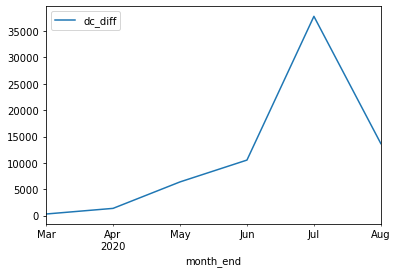

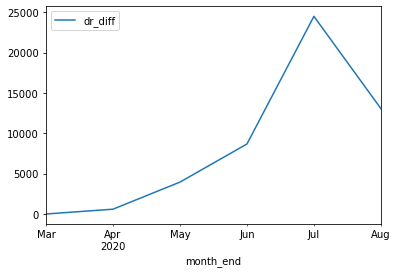

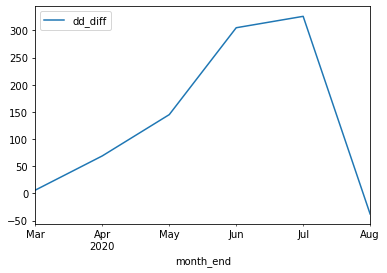

In [60]:
colls=list(diff_dataf.columns)
colls.pop(0)
colls.pop(0)
for i in colls:
    diff_dataf.plot(x="month_end",y=i)

In [61]:
dc_diff_list_min_max=[]
dr_diff_list_min_max=[]
dd_diff_list_min_max=[]

In [62]:
dc_diff_list_min_max.append(max(datamr["Daily Confirmed"])-min(datamr["Daily Confirmed"]))
dc_diff_list_min_max.append(max(dataap["Daily Confirmed"])-min(dataap["Daily Confirmed"]))
dc_diff_list_min_max.append(max(datamy["Daily Confirmed"])-min(datamy["Daily Confirmed"]))
dc_diff_list_min_max.append(max(datajn["Daily Confirmed"])-min(datajn["Daily Confirmed"]))
dc_diff_list_min_max.append(max(datajly["Daily Confirmed"])-min(datajly["Daily Confirmed"]))
dc_diff_list_min_max.append(max(dataaug["Daily Confirmed"])-min(dataaug["Daily Confirmed"]))


dr_diff_list_min_max.append(max(datamr["Daily Recovered"])-min(datamr["Daily Recovered"]))
dr_diff_list_min_max.append(max(dataap["Daily Recovered"])-min(dataap["Daily Recovered"]))
dr_diff_list_min_max.append(max(datamy["Daily Recovered"])-min(datamy["Daily Recovered"]))
dr_diff_list_min_max.append(max(datajn["Daily Recovered"])-min(datajn["Daily Recovered"]))
dr_diff_list_min_max.append(max(datajly["Daily Recovered"])-min(datajly["Daily Recovered"]))
dr_diff_list_min_max.append(max(dataaug["Daily Recovered"])-min(dataaug["Daily Recovered"]))

dd_diff_list_min_max.append(max(datamr["Daily Deceased"])-min(datamr["Daily Deceased"]))
dd_diff_list_min_max.append(max(dataap["Daily Deceased"])-min(dataap["Daily Deceased"]))
dd_diff_list_min_max.append(max(datamy["Daily Deceased"])-min(datamy["Daily Deceased"]))
dd_diff_list_min_max.append(max(datajn["Daily Deceased"])-min(datajn["Daily Deceased"]))
dd_diff_list_min_max.append(max(datajly["Daily Deceased"])-min(datajly["Daily Deceased"]))
dd_diff_list_min_max.append(max(dataaug["Daily Deceased"])-min(dataaug["Daily Deceased"]))


In [63]:
ddiff_data={"month":["March","April","May","June","July","August"],"month_end":["2020-03-31","2020-04-30","2020-05-31","2020-06-30","2020-07-31","2020-08-31"],"dc_diff":dc_diff_list_min_max,"dr_diff":dr_diff_list_min_max,"dd_diff":dd_diff_list_min_max}

In [64]:
diff_dataf=pd.DataFrame(ddiff_data)
diff_dataf['month_end'] = diff_dataf['month_end'].astype('datetime64[ns]') 
diff_dataf

,month,month_end,dc_diff,dr_diff,dd_diff
0,March,2020-03-31,309,35,14
1,April,2020-04-30,1478,684,69
2,May,2020-05-31,6393,10904,192
3,June,2020-06-30,12419,10440,1803
4,July,2020-07-31,37783,25361,752
5,August,2020-08-31,28973,25950,339


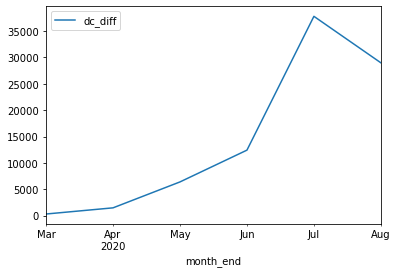

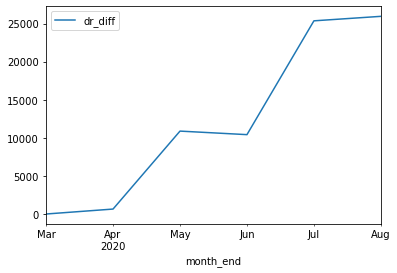

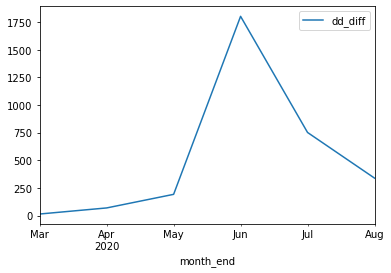

In [65]:
colls=list(diff_dataf.columns)
colls.pop(0)
colls.pop(0)
for i in colls:
    diff_dataf.plot(x="month_end",y=i)

In [66]:
dt_mrgd.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-03-01,0,3,0,3,0,0
1,2020-03-02,2,5,0,3,0,0
2,2020-03-03,1,6,0,3,0,0
3,2020-03-04,22,28,0,3,0,0
4,2020-03-05,2,30,0,3,0,0


In [67]:
pcol=['Daily Confirmed','Daily Recovered','Daily Deceased']

In [68]:
for i in range(len(pcol)-1):
    if(i==0):
        j=i
        k=1
        while(k<len(pcol)):
            a=len(dt_mrgd)*(np.sum(dt_mrgd[pcol[j]]*dt_mrgd[pcol[k]]))
            b=np.sum(dt_mrgd[pcol[j]])
            c=np.sum(dt_mrgd[pcol[k]])
            d=len(dt_mrgd)*np.sum(dt_mrgd[pcol[j]]**2)
            e=b**2
            f=len(dt_mrgd)*np.sum(dt_mrgd[pcol[k]]**2)
            g=c**2
            r=((a)-(b*c))/(((d)-(e))*((f)-(g)))
            
            print(pcol[j])
            if(k!=3):
                print(pcol[k])
            else:
                print(pcol[k-2])
                
            print(r)
            k=k+1
    else:
        a=len(dt_mrgd)*(np.sum(dt_mrgd[pcol[i]]*dt_mrgd[pcol[i+1]]))
        b=np.sum(dt_mrgd[pcol[i]])
        c=np.sum(dt_mrgd[pcol[i+1]])
        d=len(dt_mrgd)*np.sum(dt_mrgd[pcol[i]]**2)
        e=b**2
        f=len(dt_mrgd)*np.sum(dt_mrgd[pcol[i+1]]**2)
        g=c**2
        k=j+2
        r=((a)-(b*c))/(((d)-(e))*((f)-(g)))
        print(pcol[i])
        print(pcol[i+1])
        print(r)
        
            

Daily Confirmed
Daily Recovered
-6.665677724985557e-06
Daily Confirmed
Daily Deceased
-2.0371459207847045e-07
Daily Recovered
Daily Deceased
4.620363237735229e-08


<ipython-input-68-ff859e0bbfd3>:13: RuntimeWarning: overflow encountered in longlong_scalars
  r=((a)-(b*c))/(((d)-(e))*((f)-(g)))
<ipython-input-68-ff859e0bbfd3>:32: RuntimeWarning: overflow encountered in longlong_scalars
  r=((a)-(b*c))/(((d)-(e))*((f)-(g)))


In [69]:
for i in range(len(pcol)-1):
    if(i==0):
        j=i
        k=1
        while(k<len(pcol)):
            coef,pval=pearsonr(dt_mrgd[pcol[j]],dt_mrgd[pcol[k]])
            print(pcol[j]+" Vs."+pcol[k])
            print(coef)
            print(pval)
            k=k+1
    else:
        coef,pval=pearsonr(dt_mrgd[pcol[i]],dt_mrgd[pcol[i+1]])
        print(pcol[i]+" Vs."+pcol[i+1])
        print(coef)
        print(pval)

Daily Confirmed Vs.Daily Recovered
0.986849905941748
2.463782647053108e-152
Daily Confirmed Vs.Daily Deceased
0.9081049540273352
9.4045968878818e-74
Daily Recovered Vs.Daily Deceased
0.8924346508171958
1.3699383702666683e-67


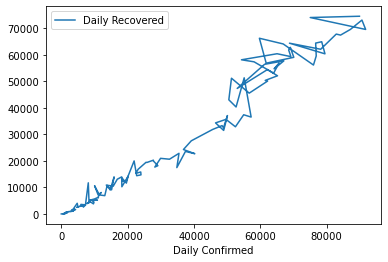

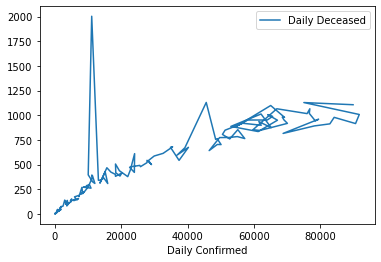

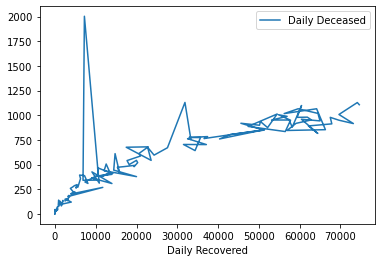

In [70]:
for i in range(len(pcol)-1):
    if(i==0):
        j=i
        k=1
        while(k<len(pcol)):
            dt_mrgd.plot(x=pcol[j],y=pcol[k])
            k=k+1
    else:
        dt_mrgd.plot(x=pcol[i],y=pcol[i+1])

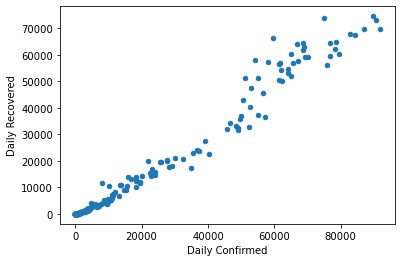

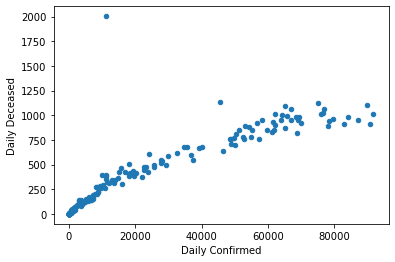

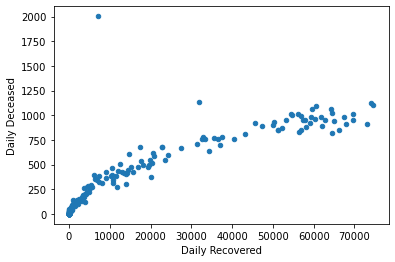

In [73]:
for i in range(len(pcol)-1):
    if(i==0):
        j=i
        k=1
        while(k<len(pcol)):
            dt_mrgd.plot(x=pcol[j],y=pcol[k],kind="scatter")
            k=k+1
    else:
        dt_mrgd.plot(x=pcol[i],y=pcol[i+1],kind="scatter")